In [14]:
import numpy as np
import matplotlib.pyplot as plt

def exEuler(f,y0,t):
    '''Aproksymacja równania y'=f(t,y) za pomocą metody Eulera.

    Parametry
    ----------
    f : funkcja
        Funkcja z prawej strony równania różniczkowego  y'=f(t,y), y(t_0)=y_0
    y0 : liczba
        Wartość warunku początkowego y(t_0)=y0 gdzie t_0 jest czasem startowym (pozycja o indeksie 0 w tablicy t)
    t : tablica
        Tablica 1D NumPy  wartości czasu, dla których aproksymujemy wartości y. 
        Krok czasowy w każdej iteracji jest równy (dla n+1 próbek wynosi (t_n-t_0)/n)

    Wartość zwracana 
    -------
    y : tablica
        Tablica aproksymowanych wartości  y(t_i), dla i=1,2,...,n
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
    

def odeFun (x, f,y ,h, t ):

  return   x - y - h * f (x,t);

  return eq


def imEuler(f,y0,t):
    '''Approximate the solution of y'=f(y,t) by implicit Euler's method.

    Parameters
    ----------
    f : function
        Right-hand side of the differential equation y'=f(t,y), y(t_0)=y_0
    y0 : number
        Initial value y(t0)=y0 where t0 is the entry at index 0 in the array t
    t : array
        1D NumPy array of t values where we approximate y values. Time step
        at each iteration is given by t[n+1] - t[n].

    Returns
    -------
    y : 1D NumPy array
        Approximation y[n] of the solution y(t_n) computed by Euler's method.
    '''
    y = np.zeros(len(t))
    y[0] = y0
    
    h = t[1]-t[0]
    
    for i in range ( 0, len(t)-1 ):
        x = y[i]+h*f(y[i],t[i]) 
        y[i+1] = fsolve (odeFun, x, args = ( f, y[i],h, t[i+1]) )
       
    return  y
    
   




In [16]:
def midPoint(f,y0,t):
    '''
    Aproksymacja rozwiązania równania y'=f(y,t)  przez metodę punktu środkowego.

     Parametry
    ----------
    f : funkcja
        Funkcja z prawej strony równania różniczkowego  y'=f(t,y), y(t_0)=y_0
    y0 : liczba
        Wartość warunku początkowego y(t_0)=y0 gdzie t_0 jest czasem startowym (pozycja o indeksie 0 w tablicy t)
    t : tablica
        Tablica 1D NumPy  wartości czasu, dla których aproksymujemy wartości y. 
        Krok czasowy w każdej iteracji jest równy (dla n+1 próbek wynosi (t_n-t_0)/n)

    Wartość zwracana 
    -------
    y : tablica
        Tablica aproksymowanych wartości  y(t_i), dla i=1,2,...,n
        
        

    '''
    
    n=len(t)
    h = t[1]-t[0]
    y = np.zeros(n)
    y[0] = y0
    y[1] = y[0] + h*f(y[0],t[0])#explicit Euler
    for i in range(2,n):
        y[i] = y[i-2] + 2*h*f(y[i-1],t[i-1])
    return y
    

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def Heun(f,y0,t):
    '''
     Aproksymacja rozwiązania równania y'=f(y,t)  przez metodę Heuna
    '''
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1]-t[0]
    for i in range(1,len(t)):
        y[i] = y[i-1] + 0.5*h*(f(y[i-1],t[i-1])+f(y[i-1]+h*f(y[i-1],t[i-1]),t[i]))
    return y

In [18]:
def RungeKutta4(f,y0,t):
    '''
    Aproksymacja rozwiązania równania y'=f(y,t)  przez metodę Runge-Kutta 4-go rzędu.

    '''
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1]-t[0]
    for i in range(1,len(t)):
        K1 = f(y[i-1],t[i-1])
        K2 = f(y[i-1]+0.5*h*K1,t[i-1]+0.5*h)
        K3 = f(y[i-1]+0.5*h*K2,t[i-1]+0.5*h)
        K4 = f(y[i-1]+h*K3,t[i-1]+h)
        y[i] = y[i-1] + (h/6)*(K1+2*K2+2*K3+K4)
    return y

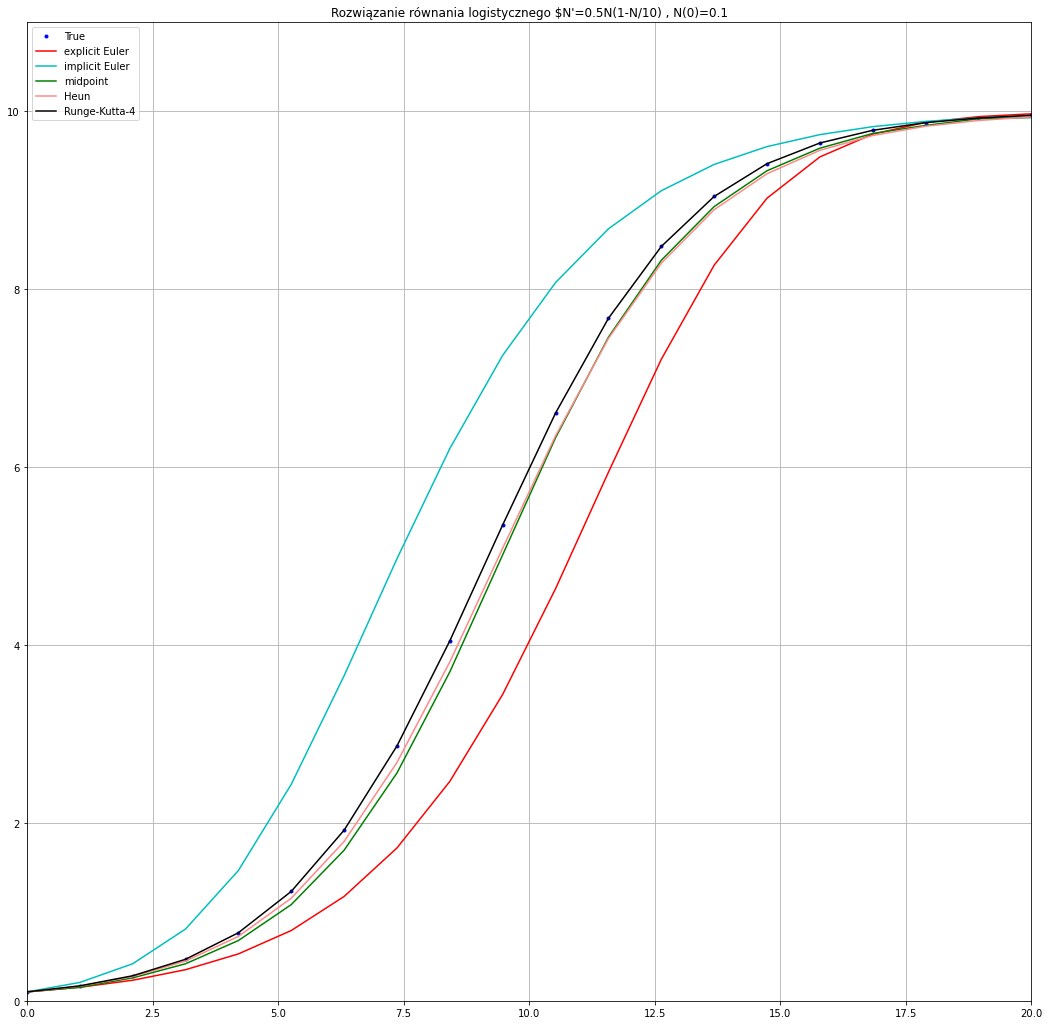

In [33]:
I=20
t = np.linspace(0,I,1*I)
fig, axs = plt.subplots(1,1,figsize=(18,18))
N0 = 0.1
r=0.5
K=10
f = lambda N,t: r*N*(1-N/K) #funkcja równania logistycznego - https://mst.mimuw.edu.pl/lecture.php?lecture=mbm&part=Ch2
N_true = K/(1+(K/N0-1)*np.exp(-r*t))#analityczne rozwiązanie równania logistycznego

N1 = exEuler(f,N0,t)
N2 = imEuler(f,N0,t)
N3 = midPoint(f,N0,t)
N5 = Heun(f,N0,t)
N8 = RungeKutta4(f,N0,t)

c5="#ff8888"
c6='#aaaaaa'
c7='#008800'
c8='#000000'

plt.plot(t,N_true,'b.',t,N1,'r',t,N2,'c',t,N3,'g',t,N5,c5,t,N8,c8,)


plt.legend(['True','explicit Euler','implicit Euler','midpoint','Heun','Runge-Kutta-4'])
plt.axis([0,I,0,K+1])
plt.grid(True)
plt.title("Rozwiązanie równania logistycznego $N'=0.5N(1-N/10) , N(0)=0.1")
plt.show()

In [20]:
def forceAspect(ax,aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

In [21]:
import math
g = 9.81
R0=[0.0,0.0] #m
F0=[10.0,10.0] #N
M=1 #kg

N=1000
F = [F0]
for i in range(N):
    F.append([0.0,-g*M])

#przedział czasowy ruchu    
T0=0 #s
T1=1.5 #s
'''
Prędkość początkowa jest obliczana na podstawie działania siły F0 przez czas 1 s

F(t) = ma(t) = mv'(t) 
v0 =(1/m)*int_0^1 F(t)dt = (1/m)* F0*(1-0) = F0/m  [(1/kg)*N*s]=[m/s]  
'''


def moveExEuler(n,t0,t1,r0,f,m):
    time0 = t0 #s
    time1 = t1 #s
    deltaT = (time1-time0)/n
    a = [f[0][0]/m,f[0][1]/m]
    v0 = [f[0][0]/m,f[0][1]/m] 
    print(v0)
    print(m)

    TX=[r0[0]]
    TY=[r0[1]]
    WX=[v0[0]]
    WY=[v0[1]]
    for i in range(1,N):
        TX.append(TX[i-1]+WX[i-1]*deltaT)
        TY.append(TY[i-1]+WY[i-1]*deltaT)
        WX.append(WX[i-1]+(f[i-1][0]*deltaT)/m)
        WY.append(WY[i-1]+(f[i-1][1]*deltaT)/m)
        
    return [TX,TY]
        
def moveVerlet(n,t0,t1,r0,f,m):
    
    time0 = t0 #s
    time1 = t1 #s
    deltaT = (time1-time0)/n
    a = [f[0][0]/m,f[0][1]/m]
    v0 = [f[0][0]/m,f[0][1]/m] 
    
    TX=[r0[0]]
    TY=[r0[1]]
    #całkowanie explicit Euler dla pierwszego kroku
    TX.append(TX[0]+v0[0]*deltaT)
    TY.append(TY[0]+v0[1]*deltaT)
    
    for i in range(1,N):
        TX.append(-TX[i-1]+2*TX[i]+(f[i][0]*(deltaT**2))/m)
        TY.append(-TY[i-1]+2*TY[i]+(f[i][1]*(deltaT**2))/m)
    return [TX,TY]    


def force(pos,time,f0,m):
    if time == 0.0:
        return f0
    else:
        return [0.0,-m*g]
    #[-2*pos[0]*math.sin(20*time),-4*pos[1]*math.cos(10*time)] 

def moveRungeKutta(n, t0, t1, r0, f0, m):
    time0 = t0  # s
    time1 = t1  # s
    deltaT = (time1 - time0) / n
    # a = [f[0][0]/m,f[0][1]/m]
    v0 = [f0[0] / m, f0[1] / m]

    TX = [r0[0]]
    TY = [r0[1]]
    WX = [v0[0]]
    WY = [v0[1]]
    for i in range(1, N):
        
        #całkowanie stałego na przedziale czasu przyspieszenia
        K1X = WX[i-1]+deltaT*force([TX[i-1],TY[i-1]],(i-1)*deltaT,f0,m)[0]/m
        K1Y = WY[i-1]+deltaT*force([TX[i-1],TY[i-1]],(i-1)*deltaT,f0,m)[1]/m

        K2X = WX[i-1]+0.5*(deltaT)*force([TX[i-1]+0.5*deltaT*K1X,TY[i-1]+0.5*deltaT*K1Y],(i-1)*deltaT+0.5*deltaT,f0,m)[0]/m
        K2Y = WY[i-1]+0.5*(deltaT)*force([TX[i-1]+0.5*K1X,TY[i-1]+0.5*deltaT*K1Y],(i-1)*deltaT+0.5*deltaT,f0,m)[1]/m

        K3X = WX[i-1]+0.5*(deltaT)*force([TX[i-1]+0.5*deltaT*K2X,TY[i-1]+0.5*deltaT*K2Y],(i-1)*deltaT+0.5*deltaT,f0,m)[0]/m
        K3Y = WY[i-1]+0.5*(deltaT)*force([TX[i-1]+0.5*deltaT*K2X,TY[i-1]+0.5*deltaT*K2Y],(i-1)*deltaT+0.5*deltaT,f0,m)[1]/m

        K4X = WX[i-1]+1.0*(deltaT)*force([TX[i-1]+deltaT*K3X,TY[i-1]+deltaT*K3Y],(i-1)*deltaT+deltaT,f0,m)[0]/m
        K4Y = WY[i-1]+1.0*(deltaT)*force([TX[i-1]+deltaT*K3X,TY[i-1]+deltaT*K3Y],(i-1)*deltaT+deltaT,f0,m)[1]/m
        

        TX.append(TX[i - 1] +  (deltaT / 6) * (K1X + 2 * K2X + 2 * K3X + K4X))
        TY.append(TY[i - 1] + (deltaT / 6) * (K1Y + 2 * K2Y + 2 * K3Y + K4Y))

        K1X = force([TX[i-1], TY[i-1]], (i - 1) * deltaT, f0, m)[0] / m
        K1Y = force([TX[i-1], TY[i-1]], (i - 1) * deltaT, f0, m)[1] / m

        K2X = force([TX[i-1] + 0.5 * deltaT * K1X, TY[i-1] + 0.5 * deltaT * K1Y], (i - 1) * deltaT + 0.5 * deltaT, f0, m)[0] / m
        K2Y = force([TX[i-1] + 0.5 * deltaT * K1X, TY[i-1] + 0.5 * deltaT * K1Y], (i - 1) * deltaT + 0.5 * deltaT, f0, m)[1] / m

        K3X = force([TX[i-1] + 0.5 * deltaT * K2X, TY[i-1] + 0.5 * deltaT * K2Y], (i - 1) * deltaT + 0.5 * deltaT, f0, m)[0] / m
        K3Y = force([TX[i-1] + 0.5 * deltaT * K2X, TY[i-1] + 0.5 * deltaT * K2Y], (i - 1) * deltaT + 0.5 * deltaT, f0, m)[1] / m

        K4X = force([TX[i-1] + deltaT * K3X, TY[i-1] + deltaT * K3Y], (i - 1) * deltaT + deltaT, f0, m)[0] / m
        K4Y = force([TX[i-1] + deltaT * K3X, TY[i-1] + deltaT * K3Y], (i - 1) * deltaT + deltaT, f0, m)[1] / m

        WX.append(WX[i - 1] + (deltaT / 6) * (K1X + 2 * K2X + 2 * K3X + K4X))
        WY.append(WY[i - 1] + (deltaT / 6) * (K1Y + 2 * K2Y + 2 * K3Y + K4Y))

    return [TX, TY]


def moveLeapfrog(n, t0, t1, r0, f0, m):
    time0 = t0  # s
    time1 = t1  # s
    deltaT = (time1 - time0) / n
    # a = [f[0][0]/m,f[0][1]/m]
    v0 = [f0[0] / m, f0[1] / m]

    TX = [r0[0]]
    TY = [r0[1]]
    WX = [v0[0]]
    WY = [v0[1]]
    for i in range(1, N):
        
        
        WX2 = WX[i-1]+0.5*deltaT*force([TX[i-1],TY[i-1]],(i-1)*deltaT,f0,m)[0]/m
        WY2 = WY[i-1]+0.5*deltaT*force([TX[i-1],TY[i-1]],(i-1)*deltaT,f0,m)[1]/m
        

        TX.append(TX[i - 1] + WX2*deltaT)
        TY.append(TY[i - 1] + WY2*deltaT)

        WX.append(WX2+0.5*deltaT*force([TX[i],TY[i]],(i)*deltaT,f0,m)[0]/m)
        WY.append(WY2+0.5*deltaT*force([TX[i],TY[i]],(i)*deltaT,f0,m)[1]/m )

    return [TX, TY]


def moveHeun(n, t0, t1, r0, f0, m):
    time0 = t0  # s
    time1 = t1  # s
    deltaT = (time1 - time0) / n
    # a = [f[0][0]/m,f[0][1]/m]
    v0 = [f0[0] / m, f0[1] / m]

    TX = [r0[0]]
    TY = [r0[1]]
    WX = [v0[0]]
    WY = [v0[1]]
    for i in range(1, N):
        
        
        WX.append(WX[i-1]+deltaT*force([TX[i-1],TY[i-1]],(i-1)*deltaT,f0,m)[0]/m)
        WY.append(WY[i-1]+deltaT*force([TX[i-1],TY[i-1]],(i-1)*deltaT,f0,m)[1]/m )
        

        TX.append(TX[i - 1] + deltaT*(WX[i-1]+WX[i])/2)
        TY.append(TY[i - 1] + deltaT*(WY[i-1]+WY[i])/2)


    return [TX, TY]

In [22]:
#parametry dla rzutu ukośnego
V0 = [F0[0]/M,F0[1]/M] # alpha = atan2(v0[1]/v0[0])
alpha = math.atan2(V0[1],V0[0])
print(V0)

[10.0, 10.0]


In [34]:
N=100 # powtórzyć dla N=1000 oraz N=10
     
T0=0 #s
T1=3 #s
R1 = moveExEuler(N,T0,T1,R0,F,M)
EEX=R1[0]
EEY=R1[1]

R2 = moveVerlet(N,T0,T1,R0,F,M)
VX=R2[0]
VY=R2[1]

R3 = moveRungeKutta(N,T0,T1,R0,F0,M)
RKX=R3[0]
RKY=R3[1]

R4 = moveLeapfrog(N,T0,T1,R0,F0,M)
LFX=R4[0]
LFY=R4[1]

R5 = moveHeun(N,T0,T1,R0,F0,M)
HX=R5[0]
HY=R5[1]

[10.0, 10.0]
1


14.142135623730951


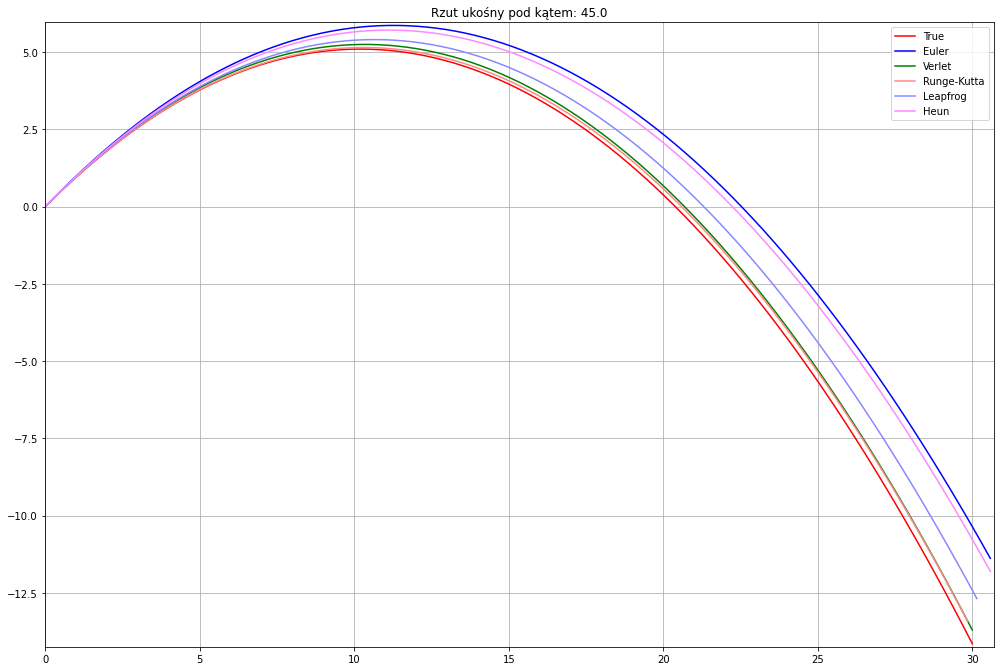

In [35]:
cRK="#ff8888"
cLF="#8888ff"
cH="#ff88ff"



import math
fig, ax = plt.subplots(1,1,figsize=(17,17))
ax.set_aspect(1)
t_true = np.linspace(T0,T1,N+1)
v0_norm=math.sqrt(V0[0]**2+V0[1]**2)
print(v0_norm)
x_true=v0_norm*t_true*math.cos(alpha)
y_true = v0_norm*t_true*math.sin(alpha)-(g*t_true**2)/2 
#print(EX[2])
#print(y_true[2])
plt.plot(x_true,y_true,'r-',EEX,EEY,'b-',VX,VY,'g-',RKX,RKY,cRK, LFX,LFY,cLF, HX,HY,cH)
plt.legend(['True','Euler','Verlet','Runge-Kutta', 'Leapfrog','Heun'])

MINX = min(min(x_true),min(EEX),min(VX),min(RKX), min(LFX), min(HX))-0.01
MAXX = max(max(x_true),max(EEX),max(VX),max(RKX), max(LFX), max(HX))+0.1
MINY = min(min(y_true),min(EEY),min(VY),min(RKY), min(LFY), min(HY))-0.1
MAXY = max(max(y_true),max(EEY),max(VY),max(RKY), max(LFY), max(HY))+0.1
#MINX = min(RKX)-0.01
#MAXX = max(RKX)+0.1
#MINY = min(RKY)-0.1
#MAXY = max(RKY)+0.1

plt.axis([MINX,MAXX,MINY,MAXY])
plt.grid(True)
Alpha=alpha*180.0/math.pi
plt.title("Rzut ukośny pod kątem: "+str(Alpha))
plt.show()